___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!

Vamos analizar como as pessoas que tem acesso a internet em casa e as que não tem usam a internet

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

dados = pd.read_csv('DOM2015.csv',sep=',')

In [2]:
print('Como que as pessoas utilizam a internet?')
print(os.getcwd())

Como que as pessoas utilizam a internet?
C:\Users\marco\Desktop\Insper\Ciencia dos Dados\Projeto1


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
df = {}
df['ACESSO'] = dados['V02322']
df['MICRO'] = dados['V02323']
df['CELULAR'] = dados['V02324']
df['TABLET'] = dados['V02325']
df['TV']=dados['V02326']
df['OUTROS'] = dados['V02327']
df['RENDA'] = dados['V4622']
df['RENDAA'] = dados['V4621']
df = pd.DataFrame.from_dict(df)
df.head()

,ACESSO,CELULAR,MICRO,OUTROS,RENDA,RENDAA,TABLET,TV
0,4.0,NaN,NaN,NaN,4.0,800.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,4.0,2.0,4.0,4.0,1150.0,4.0,4.0
3,2.0,2.0,2.0,4.0,4.0,793.0,4.0,4.0
4,4.0,NaN,NaN,NaN,6.0,2900.0,NaN,NaN


Sim    57.7
Não    42.3
Name: ACESSO, dtype: float64 



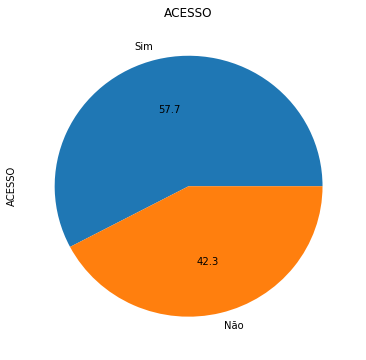

In [5]:
df2 = df.ACESSO#.dropna()
df2 = df2.astype('category')
df2.cat.categories = ('Sim', 'Não')
df2 = (df2.value_counts(normalize=True)*100).round(decimals=1)#.reindex(['SIM','NÃO'])



print(df2,'\n')
# Gráfico de Setor
plot = df2.plot(kind='pie',title='ACESSO',autopct='%.1f',figsize=(6, 6))

In [6]:

df.ACESSO = df.ACESSO.astype('category')
df.MICRO = df.MICRO.astype('category')
df.CELULAR = df.CELULAR.astype('category')
df.TABLET = df.TABLET.astype('category')
df.TV = df.TV.astype('category')
df.OUTROS = df.OUTROS.astype('category')
df.RENDA = df.RENDA.astype('category')

df.ACESSO.cat.categories = ('Sim', 'Não')
df.MICRO.cat.categories = ('Sim', 'Não')
df.CELULAR.cat.categories = ('Sim', 'Não')
df.TABLET.cat.categories = ('Sim', 'Não')
df.TV.cat.categories = ('Sim', 'Não')
df.OUTROS.cat.categories = ('Sim', 'Não')
df.RENDA.cat.categories = ('0', '1/4','1/2','1','2','3','5','5+','SD')
df = df.dropna()
df.head()

df = df[df['RENDA'] != 'SD'].dropna(axis=0)
df = df[df['RENDAA'] != 999999999999].dropna(axis=0)

df.ACESSO.value_counts()

Sim    66332
Não        0
Name: ACESSO, dtype: int64

In [7]:
ct = df.TV.value_counts()
print(ct)

def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)


ct1=pd.crosstab(df.TV,df.RENDA,margins=True,rownames=['Acesso por TV'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct1


Não    61611
Sim     4721
Name: TV, dtype: int64


Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por TV,,,,,,,,,
Sim,5.0,1.0,2.0,3.0,6.0,10.0,16.0,25.0,7.0
Não,95.0,99.0,98.0,97.0,94.0,90.0,84.0,75.0,93.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [8]:
ct3=pd.crosstab(df.CELULAR,df.RENDA,margins=True,rownames=['Acesso por Celular'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct3


Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Celular,,,,,,,,,
Sim,93.0,94.0,94.0,93.0,92.0,92.0,92.0,94.0,93.0
Não,7.0,6.0,6.0,7.0,8.0,8.0,8.0,6.0,7.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [9]:
ct2=pd.crosstab(df.MICRO,df.RENDA,margins=True,rownames=['Acesso por PC'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct2

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por PC,,,,,,,,,
Sim,62.0,30.0,42.0,57.0,72.0,84.0,90.0,94.0,67.0
Não,38.0,70.0,58.0,43.0,28.0,16.0,10.0,6.0,33.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [10]:
ct4=pd.crosstab(df.TABLET,df.RENDA,margins=True,rownames=['Acesso por Tablet'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct4

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Tablet,,,,,,,,,
Sim,16.0,8.0,10.0,14.0,18.0,26.0,34.0,47.0,20.0
Não,84.0,92.0,90.0,86.0,82.0,74.0,66.0,53.0,80.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [11]:
ct5=pd.crosstab(df.OUTROS,df.RENDA,margins=True,rownames=['Acesso por Outros'], colnames=['Salários Mínimos']).apply(percConvert, axis=0)
ct5

Salários Mínimos,0,1/4,1/2,1,2,3,5,5+,All
Acesso por Outros,,,,,,,,,
Sim,2.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0
Não,98.0,100.0,100.0,100.0,99.0,99.0,98.0,97.0,99.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


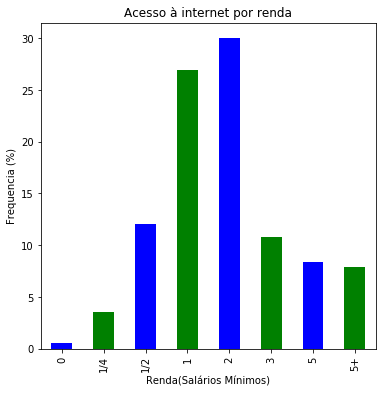

In [12]:

ut1 = (df.RENDA.value_counts(normalize=True)*100).round(decimals=1).reindex(["0",'1/4','1/2','1','2','3','5','5+'])
# Gráfico de barras
plot = ut1.plot(kind='bar',title='Acesso à internet por renda',figsize=(6, 6),color=('b','g'))
plt.ylabel('Frequencia (%)')
plt.xlabel('Renda(Salários Mínimos)')

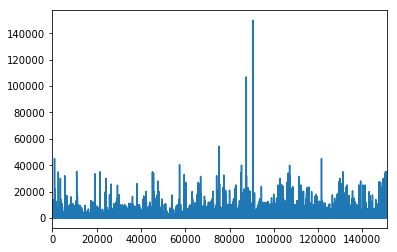

In [93]:
df.RENDAA.plot()

___
## Conclusão 

Descreva aqui suas conclusões!